In [1]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
import matplotlib
import matplotlib.pyplot as plt
import datetime
import keras
import sklearn.linear_model as lm

Using TensorFlow backend.


In [2]:
train = pd.read_csv('Train.csv')

In [3]:
goal = 'target_2015'

In [4]:
train

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.0,887.764222,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,4e3c389a-14ce-11ea-bce5-f49634744a41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,35.86,-15.44,0.0,635.675022,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,4e6f5dfd-14ce-11ea-bce5-f49634744a41
16462,35.86,-15.43,0.0,632.598892,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,4e6f5dfe-14ce-11ea-bce5-f49634744a41
16463,35.86,-15.42,0.0,632.450136,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,4e6f5dff-14ce-11ea-bce5-f49634744a41
16464,35.86,-15.41,0.0,629.272733,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,4e6f5e00-14ce-11ea-bce5-f49634744a41


The data:

The land cover classifications are from:

https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MCD12Q1

This dataset is using the Land Cover Type 1: Annual International Geosphere-Biosphere Programme (IGBP) classification (LC_Type1)

Here are the types, colors, and description for the types of land cover in this system:

LC_Type1 Class Table

Value	Color	Description
1	05450a	Evergreen Needleleaf Forests: dominated by evergreen conifer trees (canopy >2m). Tree cover >60%.
2	086a10	Evergreen Broadleaf Forests: dominated by evergreen broadleaf and palmate trees (canopy >2m). Tree cover >60%.
3	54a708	Deciduous Needleleaf Forests: dominated by deciduous needleleaf (larch) trees (canopy >2m). Tree cover >60%.
4	78d203	Deciduous Broadleaf Forests: dominated by deciduous broadleaf trees (canopy >2m). Tree cover >60%.
5	009900	Mixed Forests: dominated by neither deciduous nor evergreen (40-60% of each) tree type (canopy >2m). Tree cover >60%.
6	c6b044	Closed Shrublands: dominated by woody perennials (1-2m height) >60% cover.
7	dcd159	Open Shrublands: dominated by woody perennials (1-2m height) 10-60% cover.
8	dade48	Woody Savannas: tree cover 30-60% (canopy >2m).
9	fbff13	Savannas: tree cover 10-30% (canopy >2m).
10	b6ff05	Grasslands: dominated by herbaceous annuals (<2m).
11	27ff87	Permanent Wetlands: permanently inundated lands with 30-60% water cover and >10% vegetated cover.
12	c24f44	Croplands: at least 60% of area is cultivated cropland.
13	a5a5a5	Urban and Built-up Lands: at least 30% impervious surface area including building materials, asphalt and vehicles.
14	ff6d4c	Cropland/Natural Vegetation Mosaics: mosaics of small-scale cultivation 40-60% with natural tree, shrub, or herbaceous vegetation.
15	69fff8	Permanent Snow and Ice: at least 60% of area is covered by snow and ice for at least 10 months of the year.
16	f9ffa4	Barren: at least 60% of area is non-vegetated barren (sand, rock, soil) areas with less than 10% vegetation.
17	1c0dff	Water Bodies: at least 60% of area is covered by permanent water bodies.

In [5]:
train.size

658640

In [6]:
sum(train['target_2015'] != 0) / train.size * 100

0.41980444552411034

/Users/giovanni/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


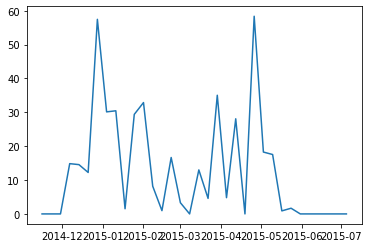

In [8]:
# %matplotlib qt
precip = train.drop(['X', 'Y', 'target_2015', 'elevation', 'LC_Type1_mode', 'Square_ID'], axis=1).iloc[60]
plt.plot([datetime.date(2014, 11, 16) + pd.Timedelta(days = i * 7) for i in range(precip.size)], precip.T)
plt.show()

In [9]:
np.cov(train[goal], train['elevation'])

array([[ 5.23190875e-02, -1.65961777e+01],
       [-1.65961777e+01,  1.25876198e+05]])

In [10]:
pearsonr(train[goal], train['elevation'])

(-0.2045060625493404, 5.555375279683985e-155)

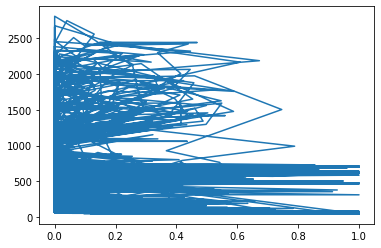

In [11]:
plt.plot(train[goal], train['elevation'])

Investigate the areas that flooded: when and how much

Neural Network Model for time series data

In [1]:
# imports that may need to be added
# misc
import datetime
import math
import os, sys, shutil
from collections import defaultdict
from tqdm import tqdm

# basics
import numpy as np
from numpy import loadtxt
import pandas as pd
from pandas.plotting import autocorrelation_plot

# from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error



# keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# charting
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline 

ModuleNotFoundError: No module named 'keras'

Modify the cell below to prepare the data for use in an LSTM model

In [2]:
# modified from https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
